### Problems to solve:

* Date ranges
* Multiple stocks
* Align dates
* Proper date order

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

- In 2014, US stocks traded for <b>252 days</b> in NYSE. This is called <b>"Sampling frequency per year"</b>.

### Task - Create  Dataframe with stock info for a given date range excluding dates that SPY didn't trade and plot data

In [2]:
# Define date range
start_date = '2010-01-01'
end_date = '2010-12-31'
dates = pd.date_range(start_date, end_date)

def symbol_to_path(symbol, base_dir = 'data'):
    '''Return CSV file path given ticker symbol'''
    return os.path.join(base_dir, '{}.csv'.format(str(symbol)))

def get_data(symbols, dates):
    '''Read stock data (adjusted close) given symbols, from CSV files'''
    df = pd.DataFrame(index = dates)
    if 'SPY' not in symbols:  # Add SPY for reference, if absent
        symbols.insert(0,'SPY')
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), 
                          index_col = 'Date', 
                          parse_dates = True, 
                          usecols = ['Date', 'Adj Close'], 
                          na_values = ['nan'])
        df_temp = df_temp.rename(columns = {'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY': # drop dates SPY did not trade
            df = df.dropna(subset=['SPY'])
    return df

### Task: Slice the dataframe for a given data range and given list of symbols

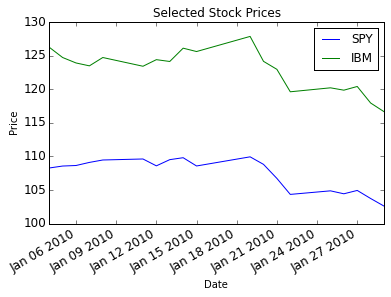

In [3]:
# Plotting

def plot_data(df, title = 'Stock prices'):
    '''Plot stock prices'''
    ax = df.plot(title = title, fontsize = 12)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    plt.show()
    
# plot_data(df)

def plot_selected(df, columns, start_index, end_index):
    '''PLot the desired columns over index values in the
    given range.'''
    df = df.ix[start_index:end_index,columns]
    plot_data(df, title = 'Selected Stock Prices')
    
columns = ['SPY', 'IBM']
start_index = '2010-01-01'
end_index = '2010-01-31'

symbols = ['GOOG', 'IBM', 'GLD']

df =  get_data(symbols, dates)

plot_selected(df, columns, start_index, end_index)

### Task: Normalize Data by divding all rows with value in first row. Value in first row will be one.  

- ix selector is powerful tool for slicing data i a dataframe.

                 SPY      GOOG       IBM       GLD
2010-01-04  1.000000  1.000000  1.000000  1.000000
2010-01-05  1.002678  0.995596  0.987880  0.999089
2010-01-06  1.003417  0.970499  0.981464  1.015574
2010-01-07  1.007666  0.947906  0.978058  1.009290
2010-01-08  1.010991  0.960542  0.987880  1.014299


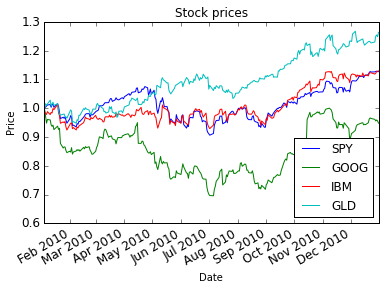

In [4]:
def normalize_data(df):
    '''Normalize stock prices using the first row of data frame.'''
    return df/df.ix[0,:]

df =  get_data(symbols, dates)

df1 = normalize_data(df)
print df1.head()
plot_data(df1)
